In [1]:
num_of_lines=400

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
#Demo_patient_week1_23=pd.read_excel("C:/Users/97254/Downloads/Demo_patient_week1_23.12.xlsx", engine='openpyxl')
#Demo_Patient_level_feeding_Daily_19 = pd.read_csv("C:/Users/97254/Downloads/Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')

#Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :3])
#dataap1 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, :1])
#dataap2 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, 43:45])

#data2['Weight_adm']=data2['Weight_adm']/data2['Height']
#data2= pd.DataFrame(data2.iloc[:10, :2])

#Demo_patient_week1_23=pd.concat([dataap1,dataap2],axis=1)
patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(400, 70)


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [3]:
patient_level__ver_12_proj1_sn_5_13 = patient_level__ver_12_proj1_sn_5_13.dropna(axis=0)
print(patient_level__ver_12_proj1_sn_5_13.shape)

(400, 70)


In [4]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

# select vars:

In [5]:
x1 = patient_level__ver_12_proj1_sn_5_13[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','Target_pro_day']]
print(x1.shape)

(400, 8)


In [6]:
x1.isnull().sum(axis = 0)

age                 0
BMI                 0
APACHEII            0
trauma              0
metabolic           0
gastrointestinal    0
Sepsis              0
Target_pro_day      0
dtype: int64

In [7]:
target = patient_level__ver_12_proj1_sn_5_13[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


LabelEncoder:

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in x1.columns:
    x1[col] = labelencoder.fit_transform(x1[col].astype(str))
x1.head()

C:\Users\Almog\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,Target_pro_day
0,53,61,8,0,1,0,1,39
1,39,147,15,0,1,0,1,16
2,25,48,0,0,0,1,1,44
3,52,16,0,0,1,1,0,29
4,41,145,9,1,1,1,0,6


# train_test_split

In [9]:
from sklearn.model_selection import train_test_split

#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=0.2, random_state=1) 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1) # 0.125 x 0.8 = 0.1
#test=0.2,train=0.7,val=0.1
x_train.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,Target_pro_day
250,52,119,0,0,1,1,1,1
164,70,127,12,1,0,1,1,2
348,9,37,0,0,0,0,1,35
396,39,173,0,0,1,1,1,15
69,44,28,5,0,0,1,0,30


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [30]:
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

#     clf = GridSearchCV(model, x_train , scoring='recall')
#     best_model = clf.fit(x_train, y_train)  
#     y_pred = best_model.predict(x_test)
    
    
    print('---------%s---------' % name)
    stats(y_test,y_pred)



---------DT---------
accuracy_score: 0.600
recall: 0.190
precision: 0.211
F-Measure: 0.200
---------RF---------
accuracy_score: 0.688
recall: 0.095
precision: 0.250
F-Measure: 0.138


C:\Users\Almog\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


# DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_score=accuracy_score(y_test, pred)
recall = recall_score(y_test, pred, average='binary')
precision = precision_score(y_test, pred, average='binary')
score = f1_score(y_test, pred, average='binary')
print('accuracy_score: %.3f' % accuracy_score)
print('recall: %.3f' % recall)
print('precision: %.3f' % precision)
print('F-Measure: %.3f' % score)
#parameters: targets to be predicted and predictions from new data used before

accuracy_score: 0.575
recall: 0.074
precision: 0.071
F-Measure: 0.073


# RandomForestClassifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
pred_y_4 = clf_4.predict(x_test)
 
print( np.unique( pred_y_4 ) )
 
recall2 = recall_score(y_test, pred, average='binary')
precision2 = precision_score(y_test, pred, average='binary')
score2 = f1_score(y_test, pred, average='binary')
print('recall: %.3f' % recall2)
print('precision: %.3f' % precision2)
print('F-Measure: %.3f' % score2)

[0 1]
recall: 0.111
precision: 0.333
F-Measure: 0.167


<ipython-input-153-f4cd16a020ee>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_4.fit(x_train, y_train)


# visual tree:

In [147]:
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)
pred = dtree2.predict(x_test)
print('Criterion=entropy', recall_score(y_test, pred))
print('Criterion=entropy', precision_score(y_test, pred))
print('Criterion=entropy', f1_score(y_test, pred))

Criterion=entropy 0.2222222222222222
Criterion=entropy 0.1935483870967742
Criterion=entropy 0.20689655172413793


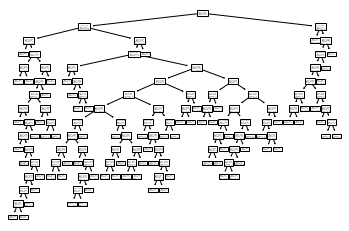

In [148]:
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

In [150]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,5):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [54]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.784314,0.784314,1
1,0.784314,0.784314,2
2,0.784314,0.784314,3
3,0.764706,0.784314,4
4,0.627451,0.764706,5
5,0.627451,0.784314,6
6,0.686275,0.745098,7
7,0.686275,0.607843,8
8,0.666667,0.705882,9
9,0.666667,0.666667,10


In [151]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)


0.1111111111111111

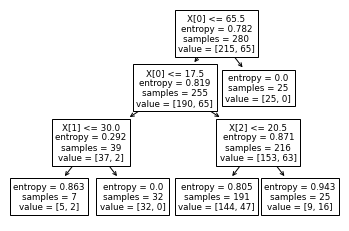

In [152]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

(266, 8)

(266,)

0.55

Criterion=gini 0.575
Criterion=entropy 0.525


0.6625